In [5]:
# Dependencies

import pandas as pd
import numpy as np

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

data = pd.read_csv("data.csv")

Exploratory Data Analysis on basic/physical attributes.

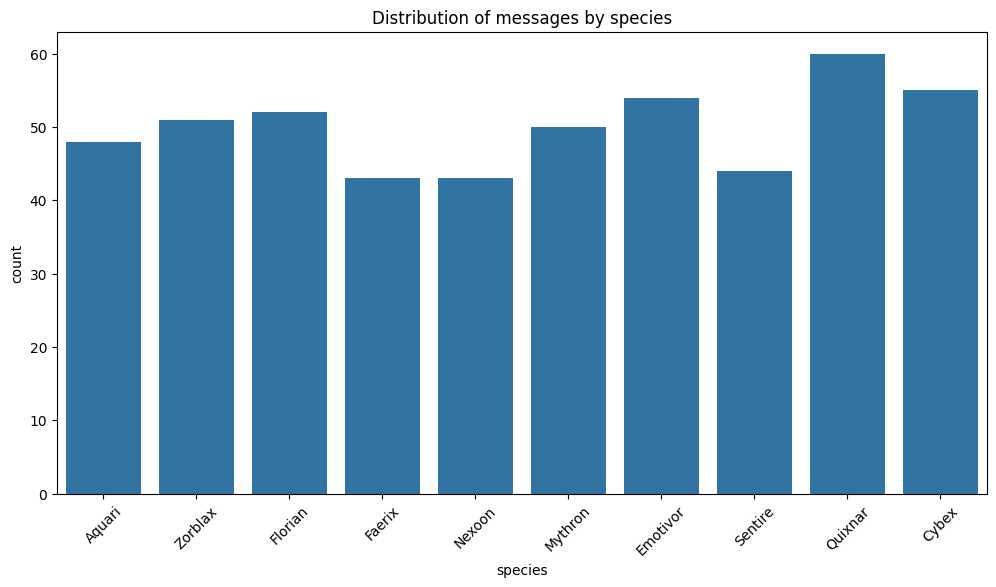

In [6]:
# Species Distribution

plt.figure(figsize=(12, 6))
sns.countplot(x = 'species', data=data)
plt.title('Distribution of messages by species')
plt.xticks(rotation = 45)
plt.show()

Pretty equal across the board.

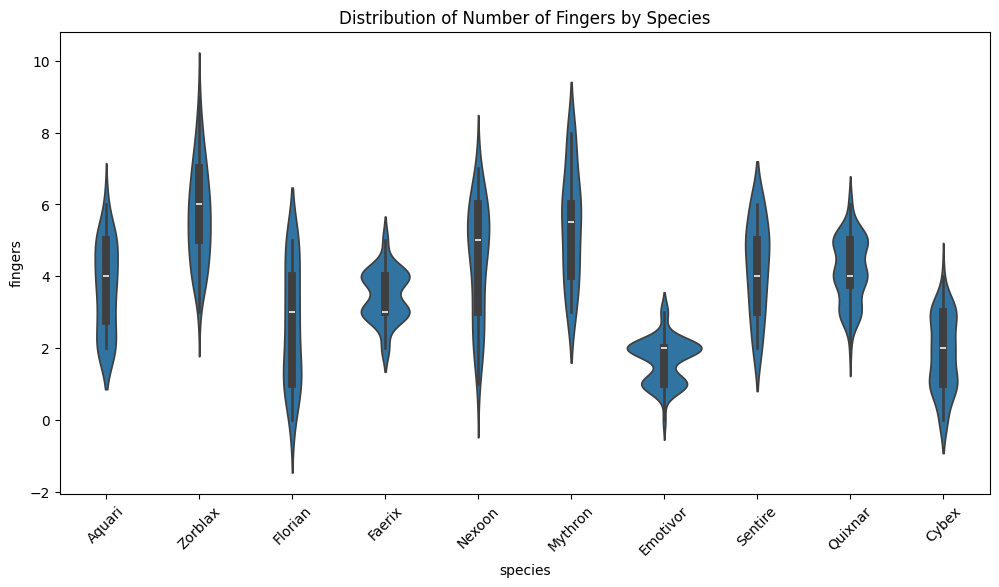

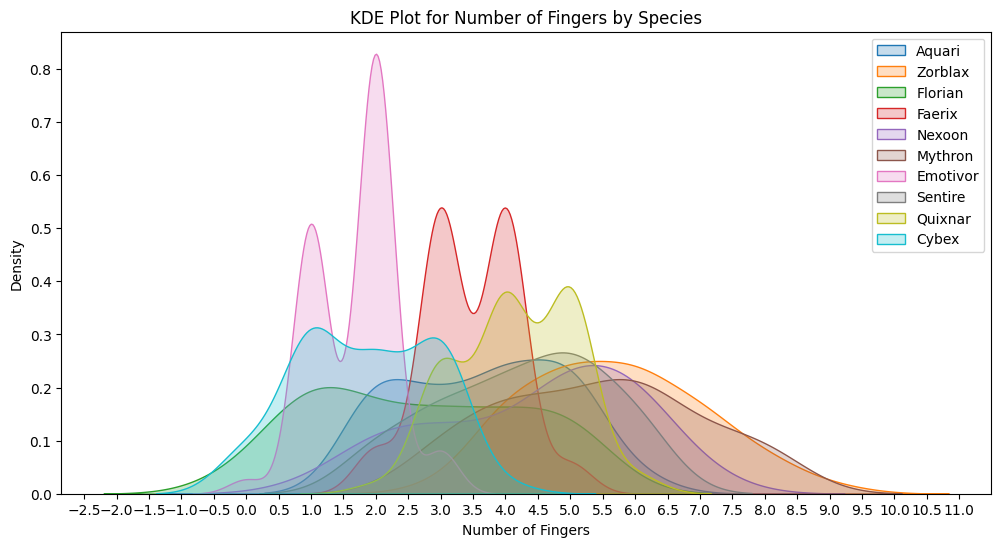

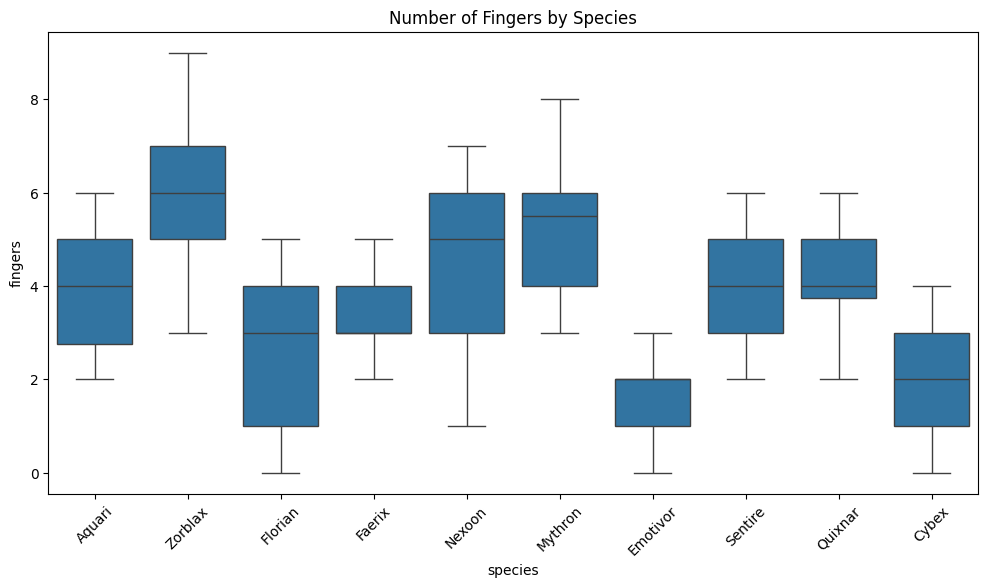

In [9]:
# Finger Distribution

# Violin plot

plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='fingers', data=data)
plt.title('Distribution of Number of Fingers by Species')
plt.xticks(rotation=45)
plt.show()

# KDE plot

plt.figure(figsize=(12, 6))
for species in data['species'].unique():
    subset = data[data['species'] == species]
    sns.kdeplot(subset['fingers'], label=species, fill=True)

plt.title('KDE Plot for Number of Fingers by Species')
plt.xlabel('Number of Fingers')
plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
plt.legend()
plt.show()

# Box plot

plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='fingers', data=data)
plt.title('Number of Fingers by Species')
plt.xticks(rotation=45)
plt.show()

Naive Inferences : 

1. The violin/KDE reveal the non-normal nature of the **Faerix** and **Emotivor** species, with it having a bimodal curve.
2. Therefore, a Gaussian Naive Bayes classification model wouldn't work perfectly for those two species, for this attribute. 
3. For the rest, they more or less follow a normal distribution, so a GNBC makes sense for them.

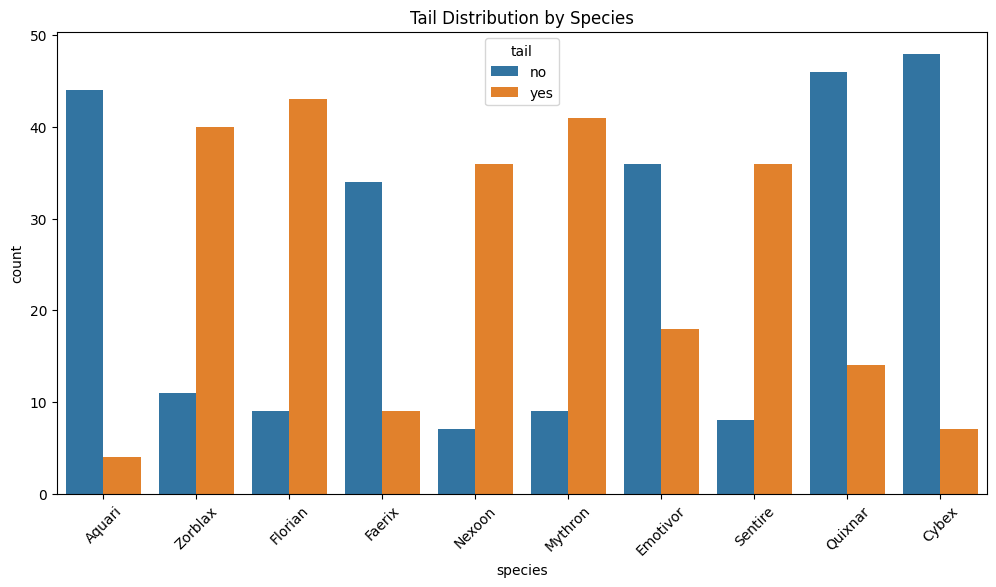

In [4]:
# Tail Distribution

plt.figure(figsize=(12, 6))
sns.countplot(x='species', hue='tail', data=data)
plt.title('Tail Distribution by Species')
plt.xticks(rotation=45)
plt.show()

Linguistic Data Analysis

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Preprocessing function to clean and tokenize text
def preprocess_message(message):

    lemmatizer = WordNetLemmatizer()
    lemmatizations = lemmatizer.lemmatize(message)
    tokens = word_tokenize(lemmatizations.lower())  # Convert to lowercase and tokenize
    filtered_words = [word for word in tokens]
    return filtered_words

# Apply the preprocessing to each message
data['Processed Message'] = data['message'].apply(preprocess_message)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


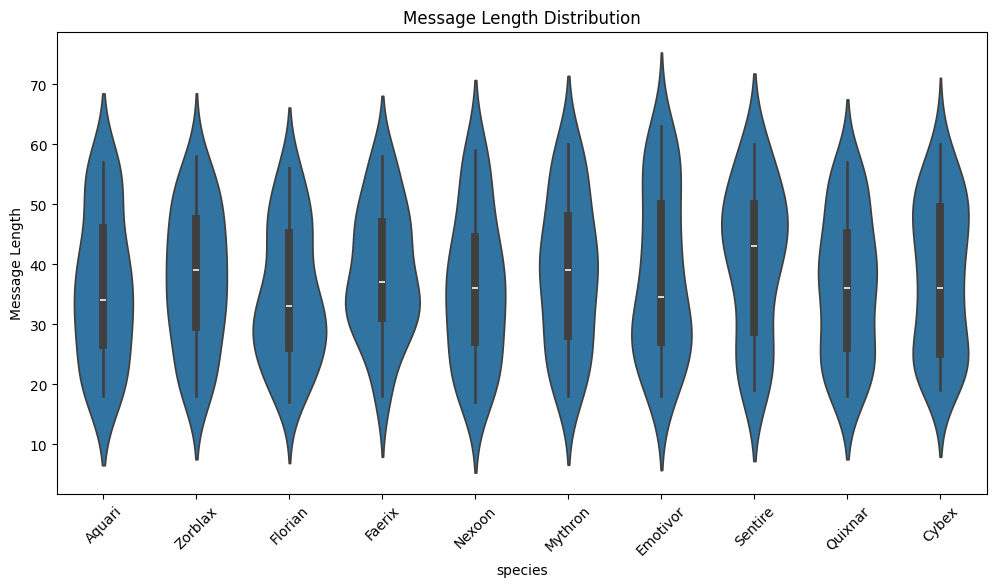

In [7]:
# Message length distribution

data['Message Length'] = data['message'].apply(len)

plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='Message Length', data=data)
plt.title('Message Length Distribution')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='fingers', ylabel='Message Length'>

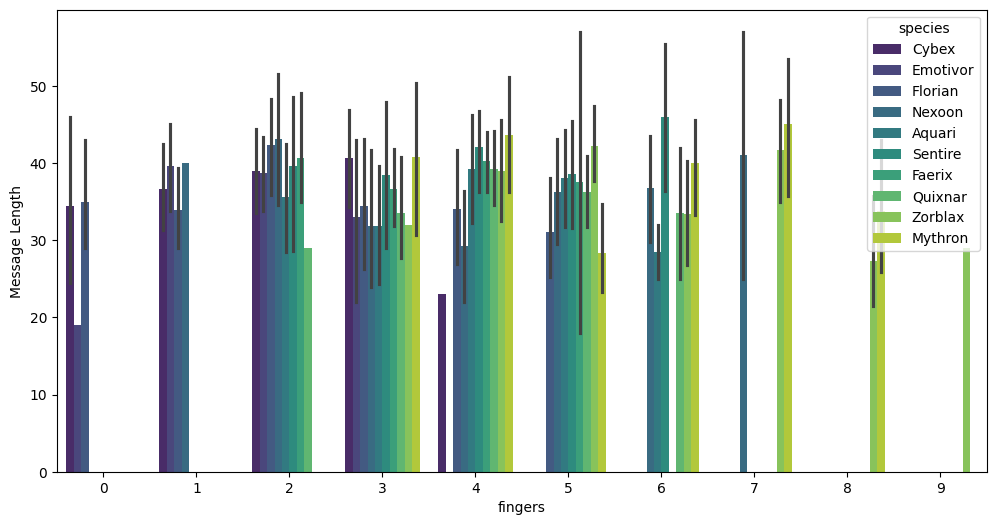

In [8]:
# Checking whether the message length correlates with the number of fingers. (Darshbir Recommendation)


plt.figure(figsize=(12,6))
sns.barplot(data=data, x = 'fingers', y = 'Message Length', hue = 'species', palette='viridis')

# Darshbir was wrong.

Looks to be pretty equal across the board, with each following approximately the same normal distribution.

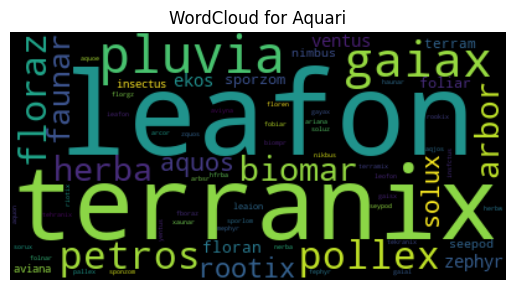

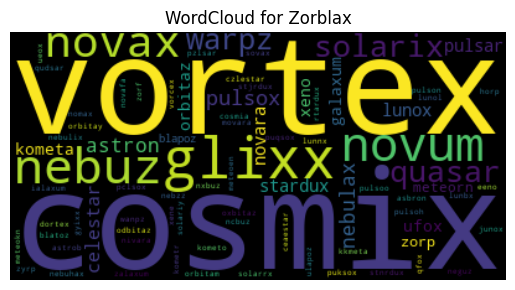

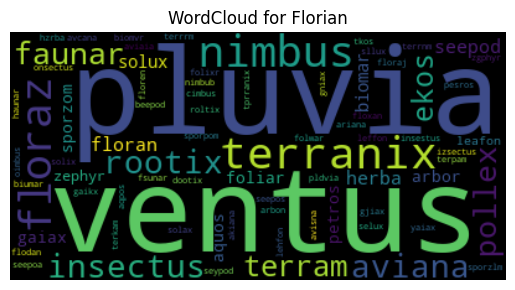

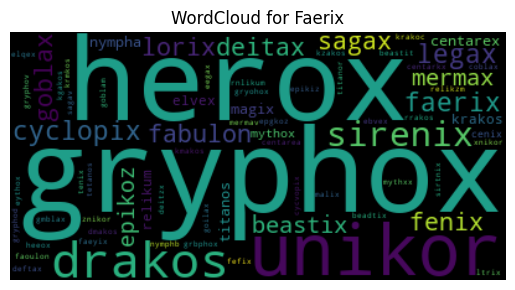

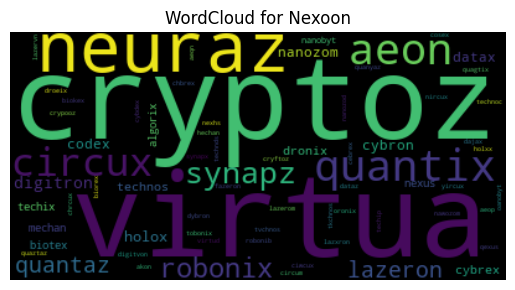

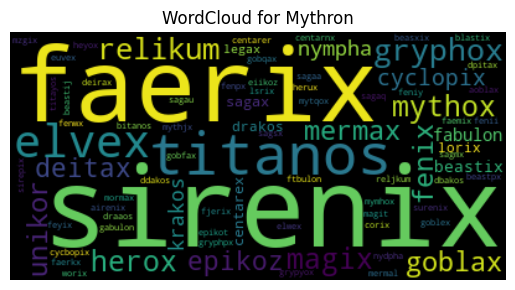

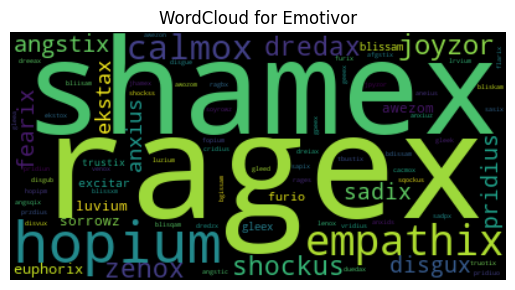

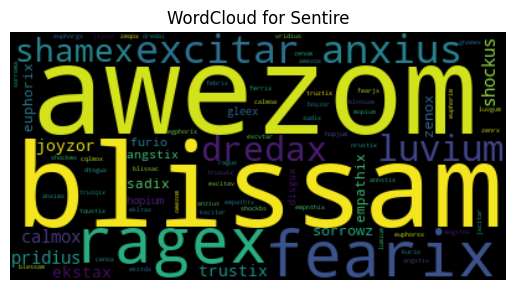

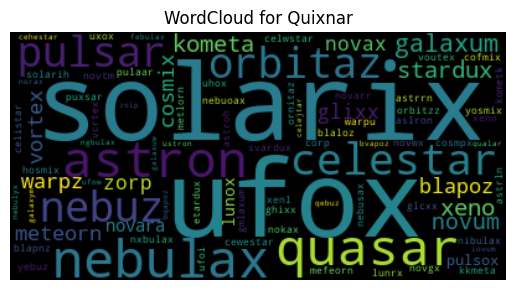

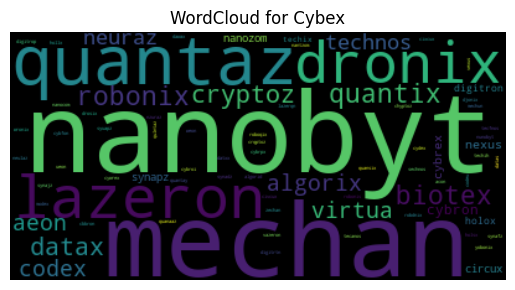

In [12]:
from collections import Counter
from wordcloud import WordCloud

def get_wordcloud(species):
    species_data = data[data['species'] == species]
    text = ' '.join(species_data['message'].tolist())
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {species}')
    plt.show()

species_list = data['species'].unique()
for species in species_list:
    get_wordcloud(species)


We can see a clear pattern here. "Cybex" has tech-oriented language, "Quixnar" has space oriented language, etc.

To-do :
1. Lemmatize these to their english counterparts, to the best possible ability. Discuss on how to do it.
2. A naive approach : Remove the random alien sounds at the end like "ex", "ix", etc. Works for quite a few words.
3. Quixnar and Zorblax are pretty similar. So are Faunar and Aquaris. Account for this, discuss.